In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("https://docs.google.com/spreadsheets/d/1yGxraWSt7XSsLJJp7datWmbR0f3FEg4t/export?format=xlsx")

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df['Description'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Description, Length: 541909, dtype: bool

In [5]:
df['Description'].dropna()

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 540455, dtype: object

In [6]:
df[df['InvoiceNo'].str.contains('C', na = False)]

df['InvoiceNo'] = df['InvoiceNo'].str.replace('C', '', regex = True)

In [7]:
df['InvoiceNo'].isnull().sum()

#df[df['InvoiceNo'].str.replace('C', ' ')]

df.isnull().any()

InvoiceNo       True
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

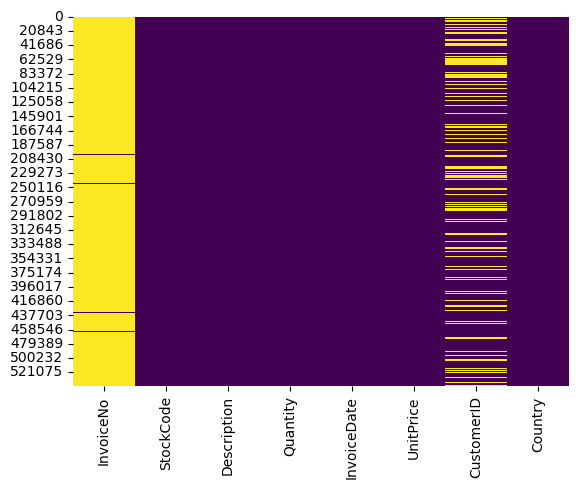

In [8]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

In [9]:
df['CustomerID'].isnull().mean() * 100

24.926694334288598

In [10]:
df = df.dropna(subset=['CustomerID'])

In [11]:
df['CustomerID'].isnull().mean() * 100

0.0

In [12]:
df['CustomerID'] = df['CustomerID'].astype('category')

In [13]:
#df['CustomerID'].dtypes
df['InvoiceDate'].dtypes

dtype('<M8[ns]')

In [14]:
max_time = df['InvoiceDate'].max() - df['InvoiceDate'].min()
max_time

Timedelta('373 days 04:24:00')

In [15]:
%matplotlib inline

In [16]:
recency = df[['CustomerID', 'InvoiceDate']].groupby(by='CustomerID', as_index = False).max()
recency

/tmp/ipykernel_61415/4211237178.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency = df[['CustomerID', 'InvoiceDate']].groupby(by='CustomerID', as_index = False).max()


,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4367,18280.0,2011-03-07 09:52:00
4368,18281.0,2011-06-12 10:53:00
4369,18282.0,2011-12-02 11:43:00
4370,18283.0,2011-12-06 12:02:00


In [17]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    8905 non-null    object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  category      
 7   Country      406829 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.8+ MB


In [18]:
last_day = df['InvoiceDate'].max()
ref_date = last_day + pd.Timedelta(days = 1)
ref_date

Timestamp('2011-12-10 12:50:00')

In [19]:
rec = (last_day - recency['InvoiceDate']).dt.days
rec

0       325
1         1
2        74
3        18
4       309
       ... 
4367    277
4368    180
4369      7
4370      3
4371     42
Name: InvoiceDate, Length: 4372, dtype: int64

In [20]:
frequency = df[['CustomerID', 'InvoiceNo']].groupby(by='CustomerID', as_index = False).count()
frequency.rename(columns = {'InvoiceNo': 'frequency'})

/tmp/ipykernel_61415/3522506127.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency = df[['CustomerID', 'InvoiceNo']].groupby(by='CustomerID', as_index = False).count()


,CustomerID,frequency
0,12346.0,1
1,12347.0,0
2,12348.0,0
3,12349.0,0
4,12350.0,0
...,...,...
4367,18280.0,0
4368,18281.0,0
4369,18282.0,1
4370,18283.0,0


In [21]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,NaN,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,NaN,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,NaN,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,NaN,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
monetary = df[['CustomerID', 'Total Price']].groupby(by='CustomerID', as_index= False).sum()
monetary

/tmp/ipykernel_61415/2099272254.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monetary = df[['CustomerID', 'Total Price']].groupby(by='CustomerID', as_index= False).sum()


,CustomerID,Total Price
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [23]:
frequency['Monetary'] = monetary['Total Price']
frequency['Recency'] = rec
frequency.head()

,CustomerID,InvoiceNo,Monetary,Recency
0,12346.0,1,0.00,325
1,12347.0,0,4310.00,1
2,12348.0,0,1797.24,74
3,12349.0,0,1757.55,18
4,12350.0,0,334.40,309


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Recency'>

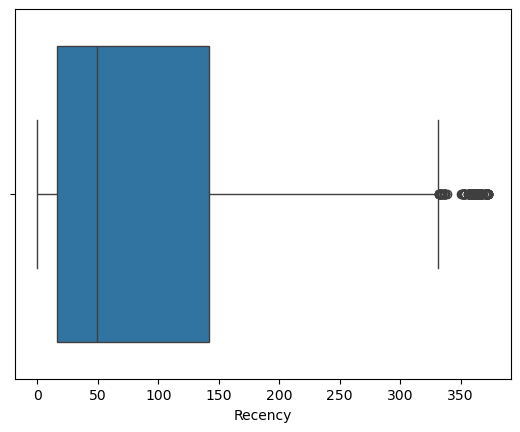

In [25]:
sns.boxplot(x = frequency['Recency'])

<AxesSubplot: ylabel='Monetary'>

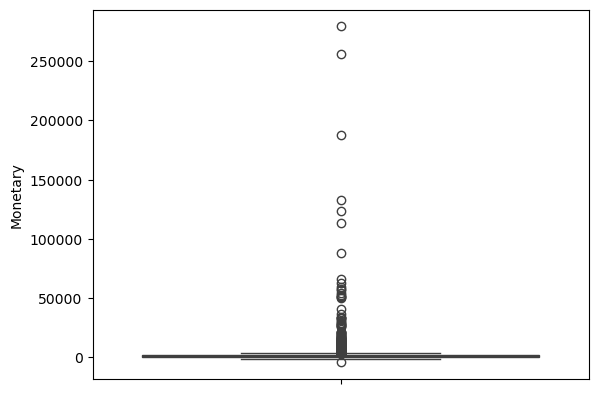

In [26]:
sns.boxplot(y = frequency['Monetary'])

In [27]:
df_new = frequency
def remove_outliers(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1

  lower = q1-1.5*iqr
  upper = q3+1.5*iqr

  return df[(df[col] >= lower) & (df[col] <= upper)]

df_new = remove_outliers(df_new, 'Monetary')
df_new

,CustomerID,InvoiceNo,Monetary,Recency
0,12346.0,1,0.00,325
2,12348.0,0,1797.24,74
3,12349.0,0,1757.55,18
4,12350.0,0,334.40,309
5,12352.0,10,1545.41,35
...,...,...,...,...
4367,18280.0,0,180.60,277
4368,18281.0,0,80.82,180
4369,18282.0,1,176.60,7
4370,18283.0,0,2094.88,3


<AxesSubplot: xlabel='Monetary'>

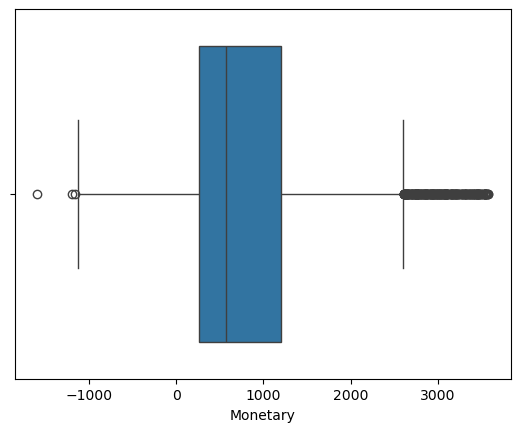

In [28]:
sns.boxplot(x = df_new['Monetary'])

In [29]:
df_new = remove_outliers(df_new,'Recency')
df_new

,CustomerID,InvoiceNo,Monetary,Recency
0,12346.0,1,0.00,325
2,12348.0,0,1797.24,74
3,12349.0,0,1757.55,18
4,12350.0,0,334.40,309
5,12352.0,10,1545.41,35
...,...,...,...,...
4367,18280.0,0,180.60,277
4368,18281.0,0,80.82,180
4369,18282.0,1,176.60,7
4370,18283.0,0,2094.88,3


<AxesSubplot: xlabel='Recency'>

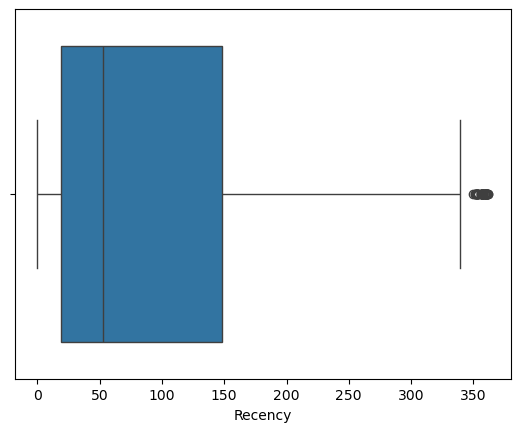

In [30]:
sns.boxplot(x = df_new['Recency'])